In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import cv2
import os
import tensorflow as tf
from glob import glob
from tqdm import tqdm
import time

In [7]:
height = 1024//4
width = 1280//4

In [12]:
# dataset_path = './'
model_path = './model/unet.h5'
save_path = './save'

In [9]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [10]:
create_dir(save_path)

In [13]:
model = tf.keras.models.load_model(model_path)

In [14]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 320, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 320, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

In [ ]:
# test_x = glob(os.path.join(dataset_path, 'frames', '*'))

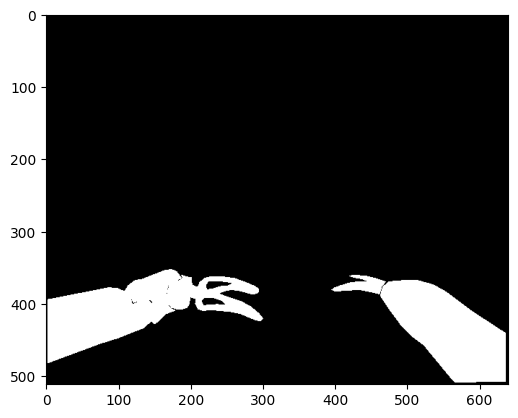

In [26]:
img_path = './train/labels_1/frame000_seq_10.png'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [23]:
time_taken = []
# for x in tqdm(test_x):
name = img_path.split('/')[-1]

x = cv2.imread(img_path, cv2.IMREAD_COLOR)
x = cv2.resize(x, (width, height))
x = x/255.0
x = np.expand_dims(x, axis=0)

start_time = time.time()
p = model.predict(x)[0]
total_time = time.time() - start_time
time_taken.append(total_time)
# p = p>0.5
p = p*255
print(p.shape)
cv2.imwrite('./save/img.png', p)
    # plt.imsave('mask.jpg', p)
    # break

1/1 [==============================] - 0s 26ms/step
(256, 320, 1)


True

In [27]:

def predict_mask(x):
    time_taken = []
    # for x in tqdm(test_x):
    name = img_path.split('/')[-1]
    
    x = cv2.imread(img_path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (width, height))
    x = x/255.0
    x = np.expand_dims(x, axis=0)
    
    start_time = time.time()
    p = model.predict(x)[0]
    return p


In [28]:
mean_time = np.mean(time_taken)
mean_fps = 1/mean_time

In [29]:
print(f'Mean Time: {mean_time: 1.5f} - Mean FPS: {mean_fps: 2.5f}')

Mean Time:  0.34088 - Mean FPS:  2.93360


In [30]:
import tensorflow as tf

def intersection_over_union(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float32)  # Threshold predictions
    
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3]) - intersection
    iou = tf.reduce_mean((intersection + 1e-7) / (union + 1e-7))  # Add epsilon to avoid division by zero
    
    return 1 - iou  # Loss is 1 - IoU

def jaccard_index(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float32)  # Threshold predictions
    
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true + y_pred, axis=[1, 2, 3]) - intersection
    jaccard = tf.reduce_mean((intersection + 1e-7) / (union + 1e-7))  # Add epsilon to avoid division by zero
    
    return 1 - jaccard  # Loss is 1 - Jaccard Index


In [ ]:
for index, x in enumerate(os.listdir(val_x)):
    y_true = val_y[index]
    y_predict = predict_mask(x)
    
sum([intersection_over_union( val_y [index], y_predict )
